# Appendix C:  Hypothesis testing with 0D confidence regions

___

### One-sample tests for univariate 0D data

A one-sample t test considers the null hypothesis:

$\overline{y} = \mu$

where $\mu$ is the hypothesiszed mean. Let's first conduct a two-tailed, one-sample t test using the `scipy.stats.ttest_1samp` function:





In [1]:
import numpy as np
from scipy import stats
from matplotlib import pyplot
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection


# generate data:    
np.random.seed(32)         #seed the random number generator to replicate results
J     = 8                  #sample size
mu    = 0                  #hypothesized mean
y     = np.random.randn(J) #Gaussian data (standard normal distribution)

# t test:
results = stats.ttest_1samp(y, mu)
print(results)


Ttest_1sampResult(statistic=3.05598561274506, pvalue=0.0184272539655784)


The p value is less than $\alpha$=0.05, implying that the null hypothesis is rejected.

Let's replicate this using manual computation of the t statistic, and probability calculation using the Student's t distribution.

In [2]:
def t_one_sample(y, mu=0):
    return (y.mean()-mu) / (  y.std(ddof=1) / (y.size)**0.5  )

t     = t_one_sample(y, mu)     #one-sample test statistic
p     = 2 * stats.t.sf(t, J-1)  #survival function for the t distribution

print('t = %.5f, p = %.5f' %(t, p))

t = 3.05599, p = 0.01843


Here the survival function represents the probability that Gaussian data would produce a t value more extreme than the observed t value.

We can also compute the critical threshold for $\alpha$=0.05 using the inverse survival function:

In [3]:
alpha = 0.05                     #type I error rate
c     = stats.t.isf(alpha, J-1)  #critical threshold (via inverse survival function)

print('Critical threshold: %.3f' %c)

Critical threshold: 1.895


The calculations above are also necessary to construct a one-sample confidence interval, as demonstrated in Appendix A and replicated below.

Confidence interval: [0.16346608 1.28165372]


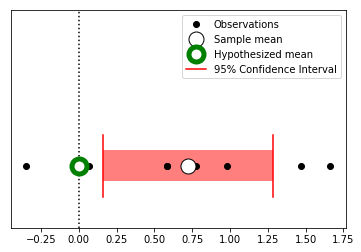

In [4]:

def confidence_interval(y, alpha=0.05):
    ybar  = y.mean()                   #sample mean
    s     = y.std(ddof=1)              #sample standard deviation
    df    = J - 1                      #degrees of freedom
    c     = stats.t.isf(alpha/2, df)   #critical test statistic
    w     = c * s / J**0.5             #interval width (critical t statistic transformed to data units)
    ci    = ybar-w, ybar+w             #confidence interval
    return np.array(ci)


def plot_data(ax, y, mu=0, plot_sample_mean=True, population_mean=None):
    ax.plot(y, np.zeros(J), 'ko', label='Observations')
    if plot_sample_mean:
        ax.plot(y.mean(), 0, 'ko', label='Sample mean', ms=15, mfc='w')
    if population_mean is not None:
        mu = population_mean
        ax.plot(mu, 0, 'go', label='Hypothesized mean', ms=15, mfc='w', mew=5)
        ax.axvline(mu, color='k', ls=':', zorder=-1)

    
def plot_interval(y, interval, color='r', height=1, alpha=0.05, label='Confidence Interval', zorder=0):
    h,hh     = height, 0.5 * height
    x        = interval
    ax.plot( [x[0]]*2, [-h, h], color=color, label='%d%s %s' %(100*(1-alpha),'%', label), zorder=zorder)
    ax.plot( [x[1]]*2, [-h, h], color=color, zorder=zorder)
    vertices = [(x[0],-hh), (x[1],-hh),    (x[1],hh), (x[0],hh)]
    patches  = PatchCollection([Polygon(vertices)])
    ax.add_collection(patches)
    pyplot.setp(patches, facecolor=color, alpha=0.5, linewidth=0, zorder=zorder)
    ax.set_ylim(-2, 5)
    ax.set_yticks([])
    




# compute 95% confidence interval:    
ci  = confidence_interval(y, alpha)
print('Confidence interval: %s' %ci)


# plot:
ax  = pyplot.axes()
plot_data(ax, y, plot_sample_mean=True, population_mean=0)
plot_interval(ax, ci)
ax.legend()
pyplot.show()


The hypothesized mean lies outside the 95% confidence interval, so identical to the one-sample test abnove, the null hypothesis is rejected.

To emphasize why the 95% CI is equivalent to a one-sample t test, let's compute t values and probability values as the hypothesized mean increases.

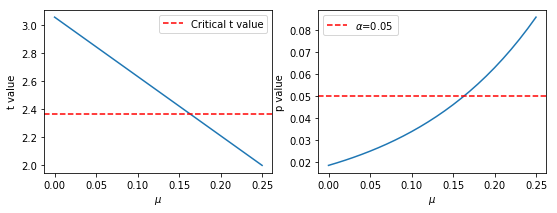

In [5]:
MU  = np.linspace(0, 0.25, 26)
t   = [t_one_sample(y, x) for x in MU]
p   = [2*stats.t.sf(tt, J-1) for tt in t]
c   = stats.t.isf(alpha/2, J-1)

# plot:
pyplot.figure(figsize=(9,3))
ax  = pyplot.subplot(121)
ax.plot(MU, t)
ax.axhline(c, color='r', ls='--', label='Critical t value')
ax.set_xlabel('$\mu$')
ax.set_ylabel('t value')
ax.legend()

ax  = pyplot.subplot(122)
ax.plot(MU, p)
ax.axhline(0.05, color='r', ls='--', label=r'$\alpha$=0.05')
ax.set_xlabel('$\mu$')
ax.set_ylabel('p value')
ax.legend()

pyplot.show()


The calculated t value crosses the critical threshold, and the p value becomes $\alpha$=0.05, for approximately $\mu$=0.16, which corresponds to the border of the 95% CI. 

Thus one-sample t tests and one-sample 95% CIs are statistically identical.

___

### Two-sample tests for univariate 0D data

Let's start with a two-sample t test on two samples of Gaussian 0D data.

In [6]:
np.random.seed(101)
J       = 8
yA      = np.random.randn(J)
yB      = -0.5 + np.random.randn(J)

results = stats.ttest_ind(yA, yB)

print(results)


Ttest_indResult(statistic=2.6174705119522232, pvalue=0.020275653653260898)


Like above, let's replicate this result manually to emphasize the t statistic calculation, and how it relates to the subsequent CIs.

In [7]:
def t_two_sample(yA, yB):
    mA,mB  = yA.mean(), yB.mean()
    sA,sB  = yA.std(ddof=1), yB.std(ddof=1)
    nA,nB  = yA.size, yB.size
    s      = (   (  (nA-1)*sA*sA + (nB-1)*sB*sB  )  /  ( nA+nB-2 )   )**0.5
    t      = (mA-mB) / s / (1.0/nA + 1.0/nB)**0.5
    return t

t          = t_two_sample(yA, yB)
p          = 2 * stats.t.sf(t, 2*J-2)

print('t = %.5f, p = %.5f' %(t, p))

t = 2.61747, p = 0.02028


In order to construct CIs for this dataset, we need to use the two-sample t statistic defintion.

In [8]:
def confidence_interval_width(yA, yB, alpha=0.05):
    sA,sB  = yA.std(ddof=1), yB.std(ddof=1)
    nA,nB  = yA.size, yB.size
    s      = (   (  (nA-1)*sA*sA + (nB-1)*sB*sB  )  /  ( nA+nB-2 )   )**0.5
    c      = stats.t.isf(alpha/2, 2*J-2)
    w      = c * s * (  (1/nA + 1/nB)**0.5  )
    return w

w   = confidence_interval_width(yA, yB, alpha)
print('CI width: %.3f' %w)

CI width: 1.098


This CI width can be used in two different ways in order to replicate the two-sample results above.  The first is to use the mean as the threshold, like this:

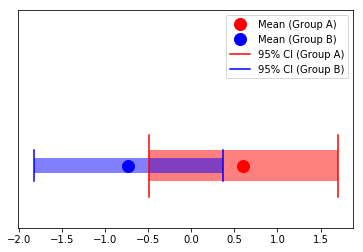

In [9]:
mA,mB     = yA.mean(), yB.mean()
ciA       = mA-w, mA+w
ciB       = mB-w, mB+w

ax        = pyplot.axes()
ax.plot(mA, 0, 'ro', ms=12, zorder=1, label='Mean (Group A)')
ax.plot(mB, 0, 'bo', ms=12, zorder=1, label='Mean (Group B)')
plot_interval(yA, ciA, color='r', height=1, alpha=0.05, label='CI (Group A)', zorder=0)
plot_interval(yB, ciB, color='b', height=0.5, alpha=0.05, label='CI (Group B)', zorder=0)
ax.legend()
pyplot.show()

Since the CIs do not contain the other group's mean, the null hypothesis is rejected.  We can emphasize this point by altering the Group B data slighlty so that the p value becomes close to $\alpha$.

In [10]:
np.random.seed(101)
J       = 8
yA      = np.random.randn(J)
yB      = -0.26 + np.random.randn(J)

results = stats.ttest_ind(yA, yB)

print(results)

Ttest_indResult(statistic=2.1488034588411806, pvalue=0.049627476138910435)


Re-plotting the CIs emphasizes the mean thresholds:

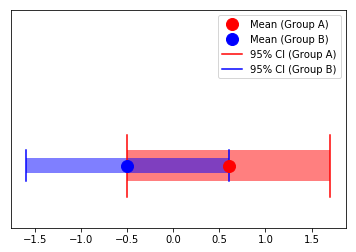

In [11]:
w         = confidence_interval_width(yA, yB, alpha)
mA,mB     = yA.mean(), yB.mean()
ciA       = mA-w, mA+w
ciB       = mB-w, mB+w

ax        = pyplot.axes()
ax.plot(mA, 0, 'ro', ms=12, zorder=1, label='Mean (Group A)')
ax.plot(mB, 0, 'bo', ms=12, zorder=1, label='Mean (Group B)')
plot_interval(yA, ciA, color='r', height=1, alpha=0.05, label='CI (Group A)', zorder=0)
plot_interval(yB, ciB, color='b', height=0.5, alpha=0.05, label='CI (Group B)', zorder=0)
ax.legend()
pyplot.show()

The second method is to use CI tail overlapping as the criterion for null hypothesis rejection. In this case we need to divide the CI width by two:

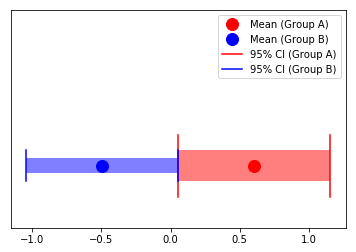

In [12]:
w2        = w / 2
mA,mB     = yA.mean(), yB.mean()
ciA       = mA-w2, mA+w2
ciB       = mB-w2, mB+w2

ax        = pyplot.axes()
ax.plot(mA, 0, 'ro', ms=12, zorder=1, label='Mean (Group A)')
ax.plot(mB, 0, 'bo', ms=12, zorder=1, label='Mean (Group B)')
plot_interval(yA, ciA, color='r', height=1, alpha=0.05, label='CI (Group A)', zorder=0)
plot_interval(yB, ciB, color='b', height=0.5, alpha=0.05, label='CI (Group B)', zorder=0)
ax.legend()
pyplot.show()


In this case, lack of tail overlap implies null hypothesis rejection. However, as illustrated in this figure, it can be difficult to judge whether the two tails do, in fact overlap.

Last, what if we were to compute one-sample CIs separately for these two samples?

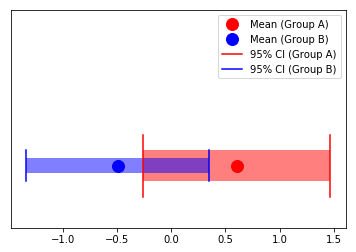

In [13]:
def confidence_interval_one_sample(y, alpha=0.05):
    J     = y.size                     #sample size
    ybar  = y.mean()                   #sample mean
    s     = y.std(ddof=1)              #sample standard deviation
    df    = J - 1                      #degrees of freedom
    c     = stats.t.isf(alpha/2, df)   #critical test statistic
    w     = c * s / J**0.5             #interval width
    ci    = ybar-w, ybar+w             #confidence interval
    return np.array(ci)


ciA       = confidence_interval_one_sample(yA, alpha)
ciB       = confidence_interval_one_sample(yB, alpha)

ax        = pyplot.axes()
ax.plot(mA, 0, 'ro', ms=12, zorder=1, label='Mean (Group A)')
ax.plot(mB, 0, 'bo', ms=12, zorder=1, label='Mean (Group B)')
plot_interval(yA, ciA, color='r', height=1, alpha=0.05, label='CI (Group A)', zorder=0)
plot_interval(yB, ciB, color='b', height=0.5, alpha=0.05, label='CI (Group B)', zorder=0)
ax.legend()
pyplot.show()

We can see that these separately-computed, one-sample CIs are unrelated to the two-sample results. Thus ONLY two-sample CIs are appropriate for two-sample comparisons.

Since confidence ellipses (Appendix B) are generalizations of CIs to bivariate data, the same is true for them: the appropriate confidence regions are design-dependent.  

___

### Summary

* A one-sample t test is equivalent to a one-sample 95% CI
* A two-sample t test is equivalent to a two-sample 95% CI, BUT
  * There are two separate thresholds: mean, tail
  * Correct CI interpretation requires specification of the threshold
* A two-sample t test is NOT equivalent to a one-sample 95% CI